## Reading the data

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


df = pd.read_csv("../../corpus_sprint3_balanced_cleaned_all.csv", encoding="utf-8")
df = df.dropna()
print(df)
print(df.shape)

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

        Row No Date received                  Product  \
446       6874      09/09/16              Payday loan   
713      10840      08/07/15            Consumer Loan   
803      12248      08/07/16            Consumer Loan   
1153     17162      05/26/16            Consumer Loan   
1185     17642      11/05/15            Consumer Loan   
...        ...           ...                      ...   
126588  222826      09/21/16  Bank account or service   
126589  142174      03/05/16  Bank account or service   
126590   55888      01/23/17  Bank account or service   
126591  293505      09/27/16  Bank account or service   
126592  327087      09/28/15  Bank account or service   

                       Sub-product                                     Issue  \
446                           None  Charged fees or interest I didn't expect   
713                   Vehicle loan       Problems when you are unable to pay   
803                   Vehicle loan                Managing the loan or leas

In [2]:
df_concat = model.docvecs.vectors_docs

## One hot encoding and concatenating

In [3]:
vectors = model.docvecs.vectors_docs

In [4]:
one_hot = pd.Categorical(df['Product'])
df_dummies = pd.get_dummies(one_hot)

one_hot2 = pd.Categorical(df['Sub-product'])
df_dummies2 = pd.get_dummies(one_hot2)

v_df = pd.DataFrame(vectors)
df_concat = pd.concat([v_df, df_dummies, df_dummies2], axis = 1)
print(df_concat.shape)

(58035, 109)


## Applying UMAP

In [5]:
import umap
data_reduced = umap.UMAP().fit_transform(df_concat)

C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\umap\spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [6]:
print(data_reduced.shape)

(58035, 2)


## Applying k-means

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


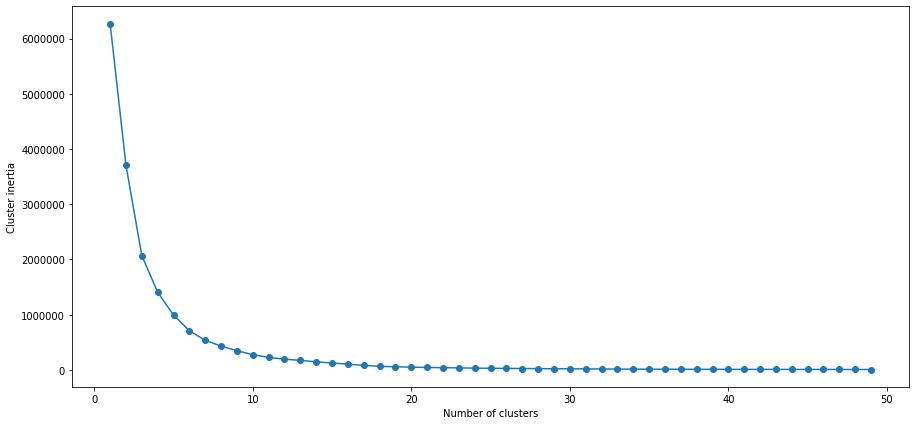

In [8]:
inertia = []
k_min=1
k_max=50
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(data_reduced)
    inertia.append(km.inertia_)
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

## Silhouette scores

For n_clusters = 4 The average silhouette_score is : 0.51218283
For n_clusters = 5 The average silhouette_score is : 0.5596895
For n_clusters = 6 The average silhouette_score is : 0.60472625
For n_clusters = 7 The average silhouette_score is : 0.6387877
For n_clusters = 8 The average silhouette_score is : 0.65918964
For n_clusters = 9 The average silhouette_score is : 0.6700122
For n_clusters = 10 The average silhouette_score is : 0.6962556
For n_clusters = 11 The average silhouette_score is : 0.71790516
For n_clusters = 12 The average silhouette_score is : 0.7322164
For n_clusters = 13 The average silhouette_score is : 0.7477236
For n_clusters = 14 The average silhouette_score is : 0.7548198
For n_clusters = 15 The average silhouette_score is : 0.76651305
For n_clusters = 16 The average silhouette_score is : 0.7859454
For n_clusters = 17 The average silhouette_score is : 0.8040202
For n_clusters = 18 The average silhouette_score is : 0.82051665
For n_clusters = 19 The average silhouet

C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 24 The average silhouette_score is : 0.7631419


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 25 The average silhouette_score is : 0.7420913


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 26 The average silhouette_score is : 0.74296314


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 27 The average silhouette_score is : 0.68476516


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 28 The average silhouette_score is : 0.6637713


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 29 The average silhouette_score is : 0.6686354


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 30 The average silhouette_score is : 0.6722228


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 31 The average silhouette_score is : 0.67374355


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 32 The average silhouette_score is : 0.67811584


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 33 The average silhouette_score is : 0.6745909


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 34 The average silhouette_score is : 0.6757878


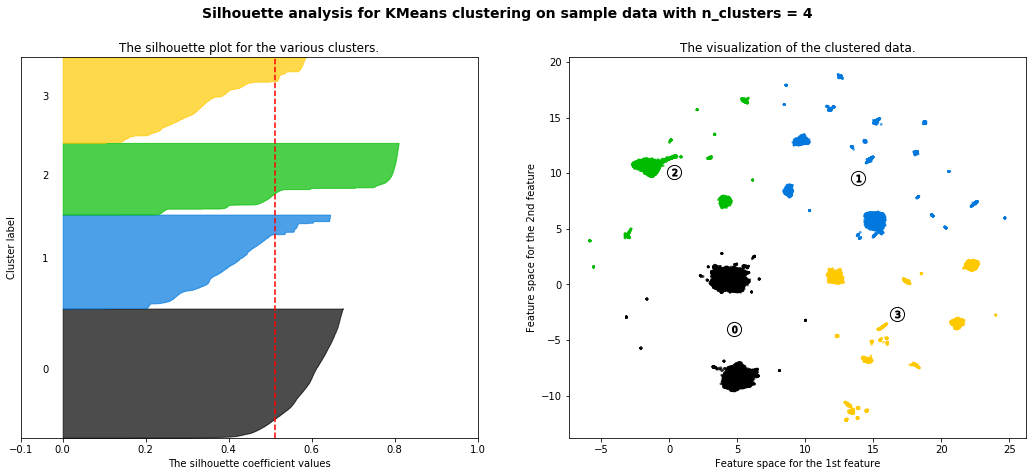

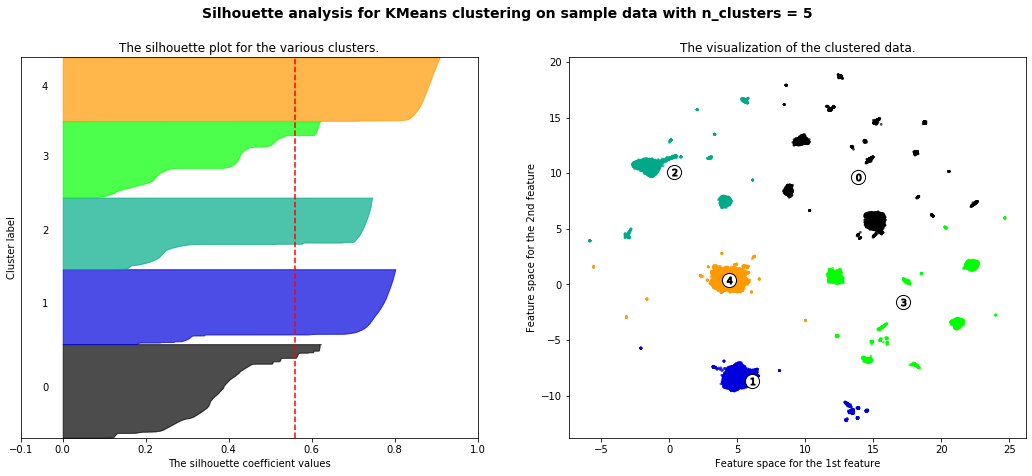

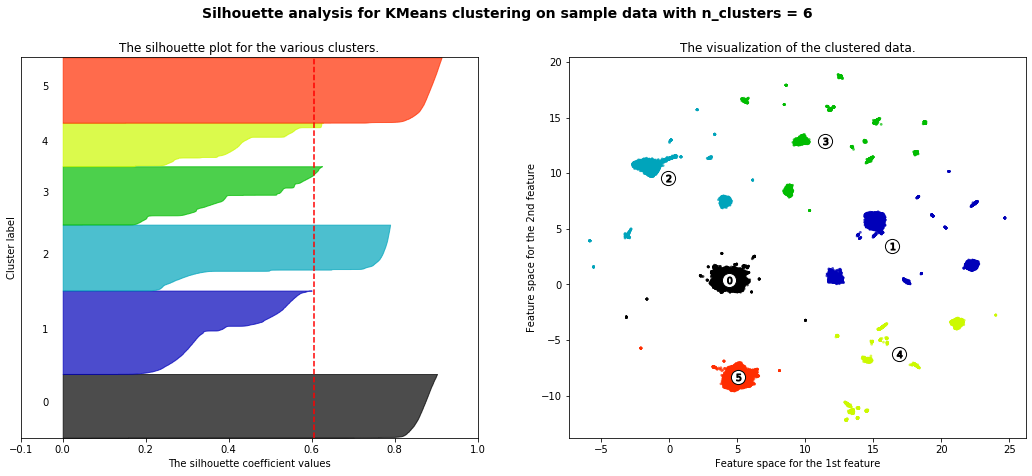

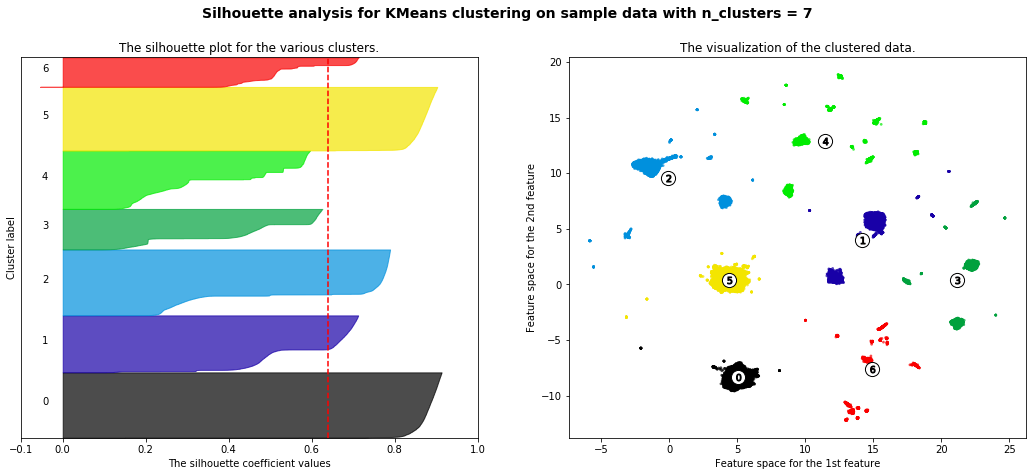

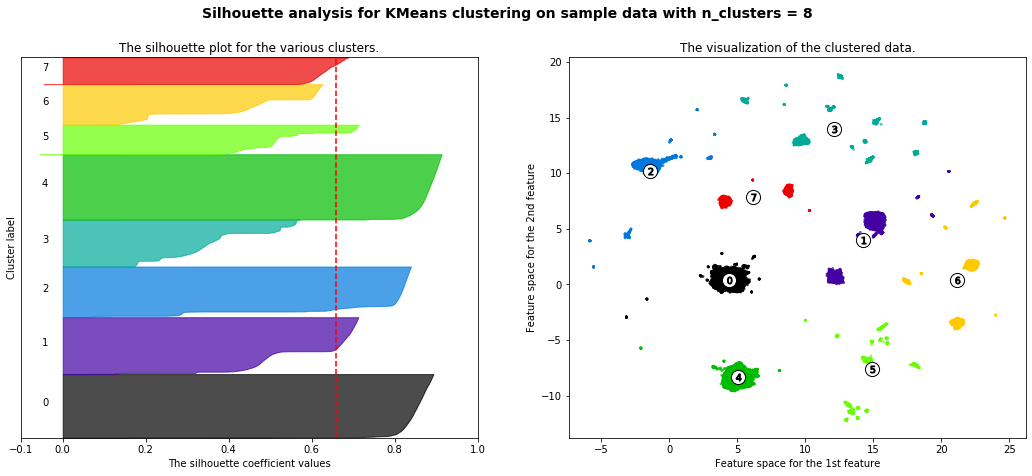

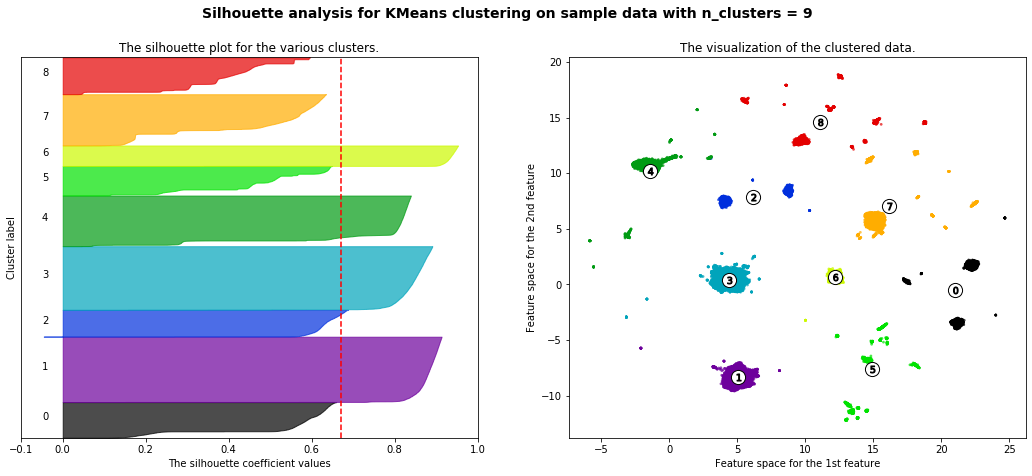

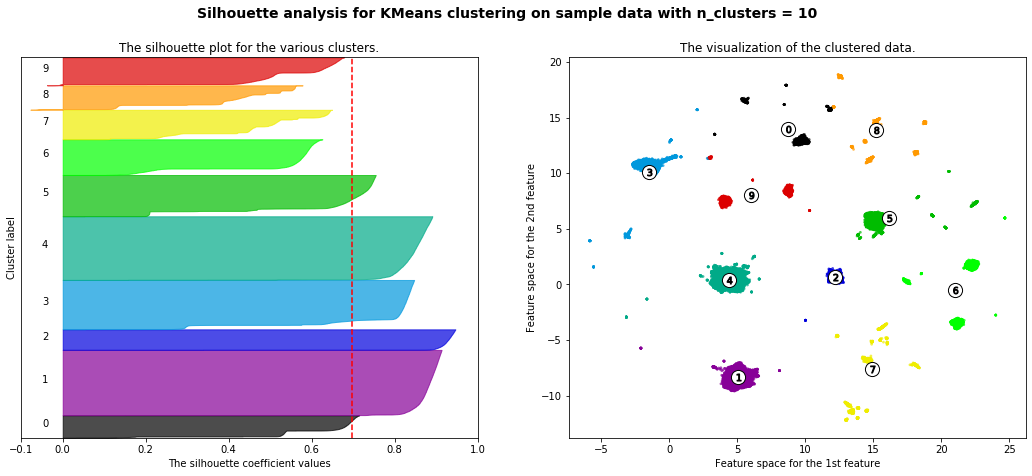

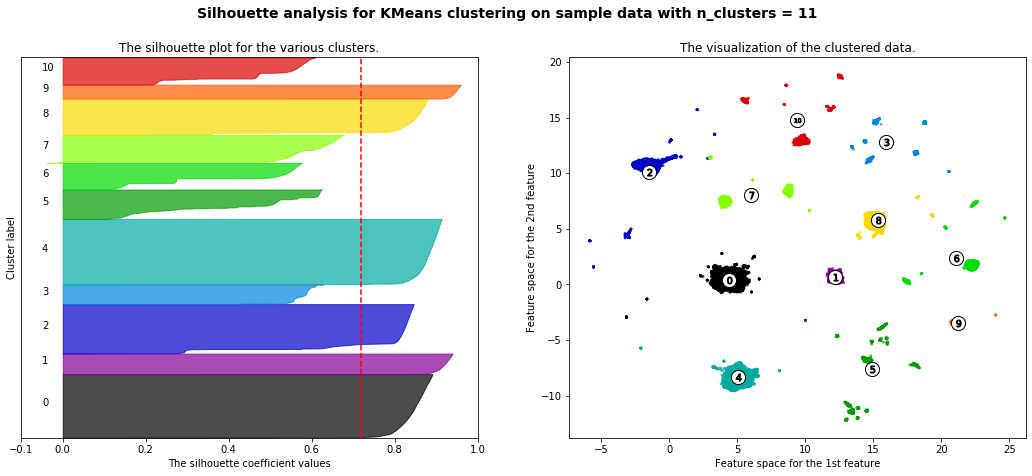

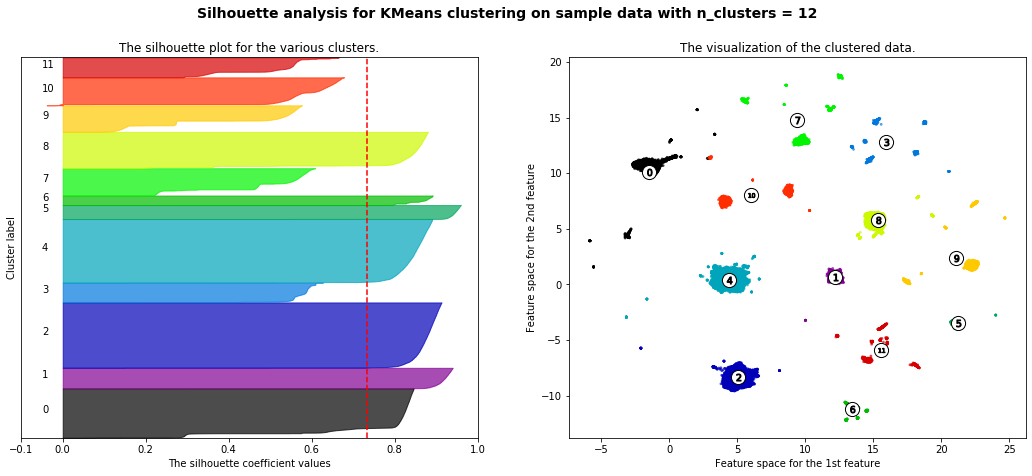

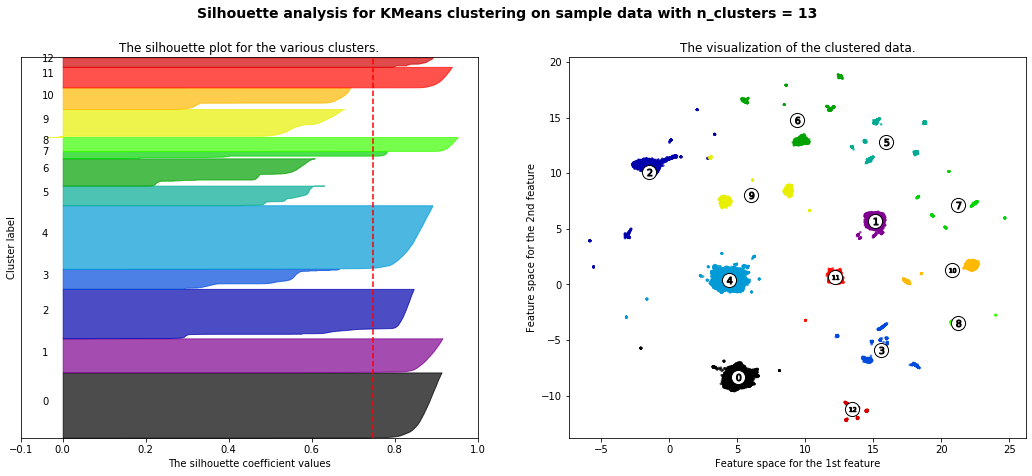

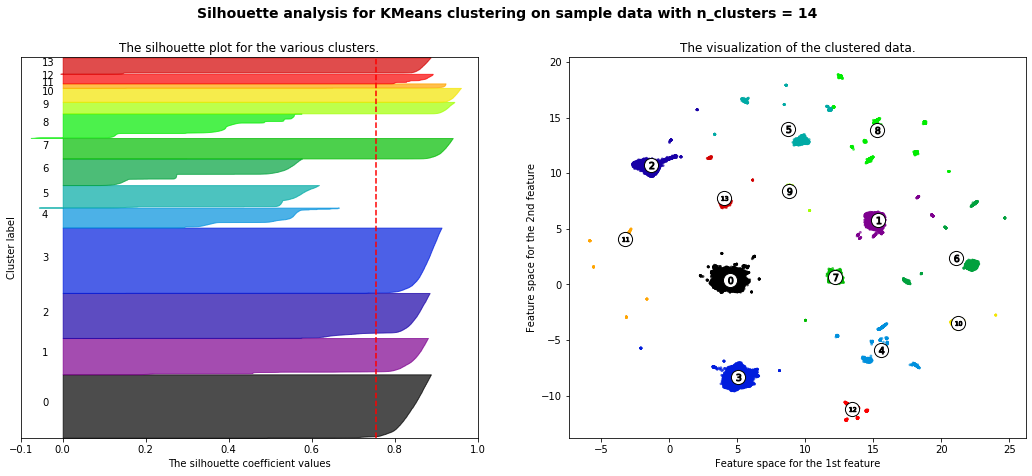

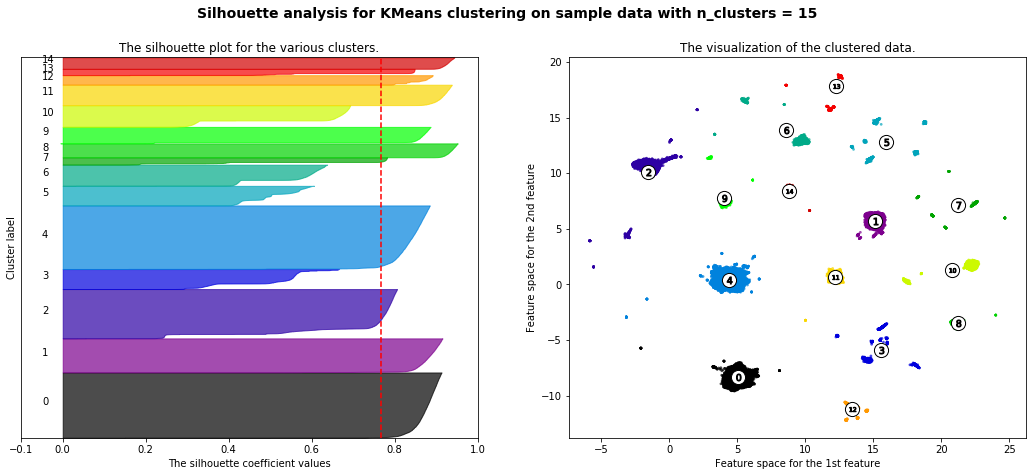

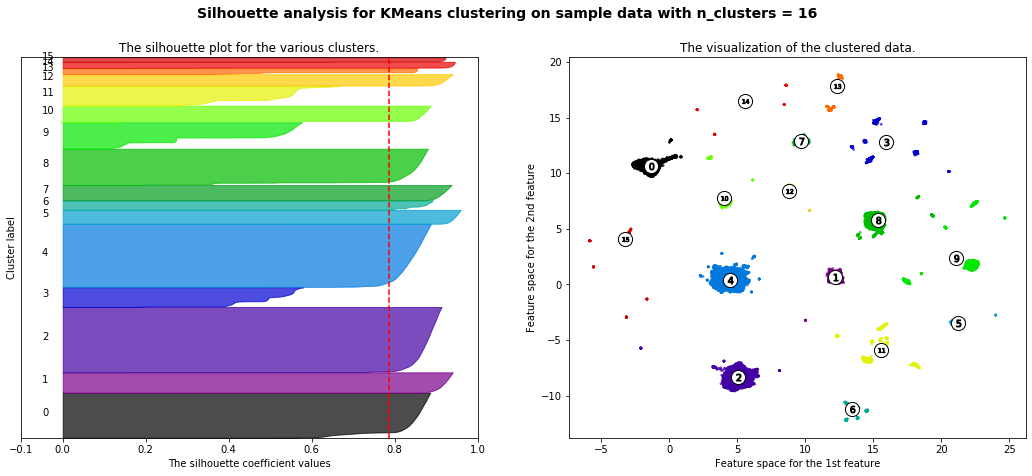

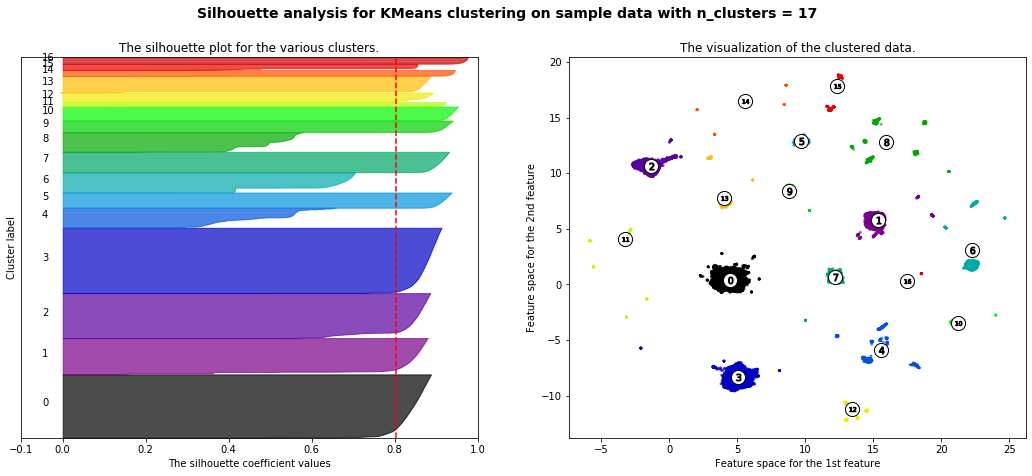

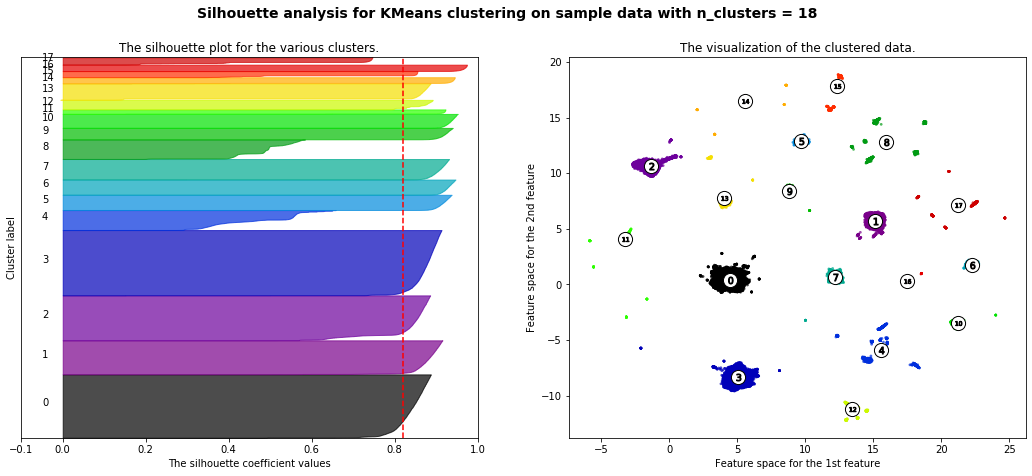

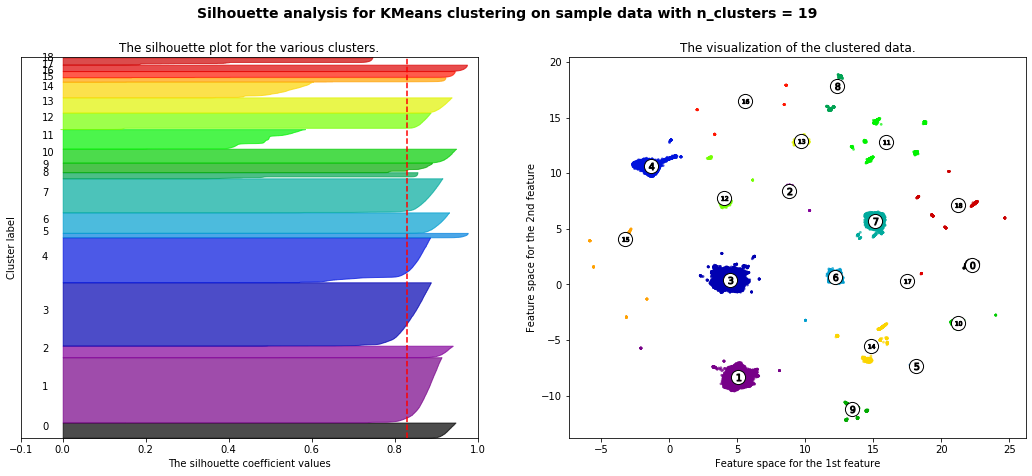

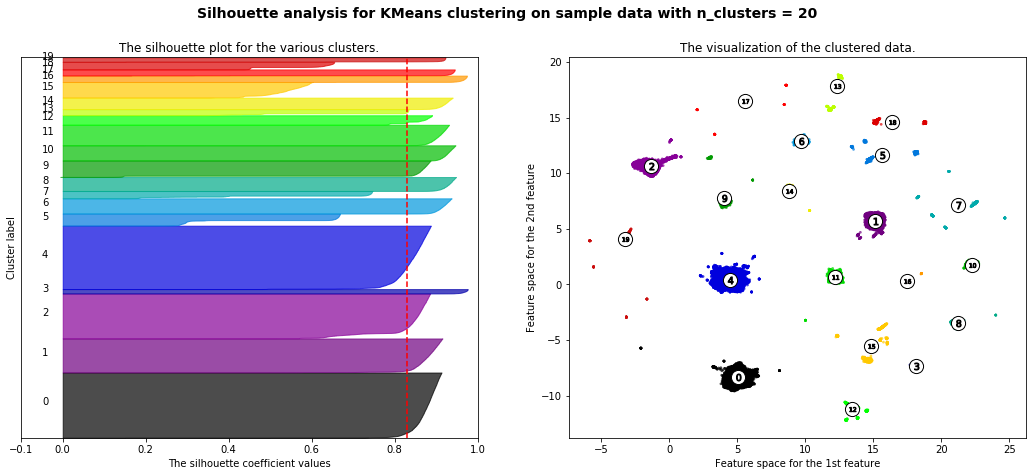

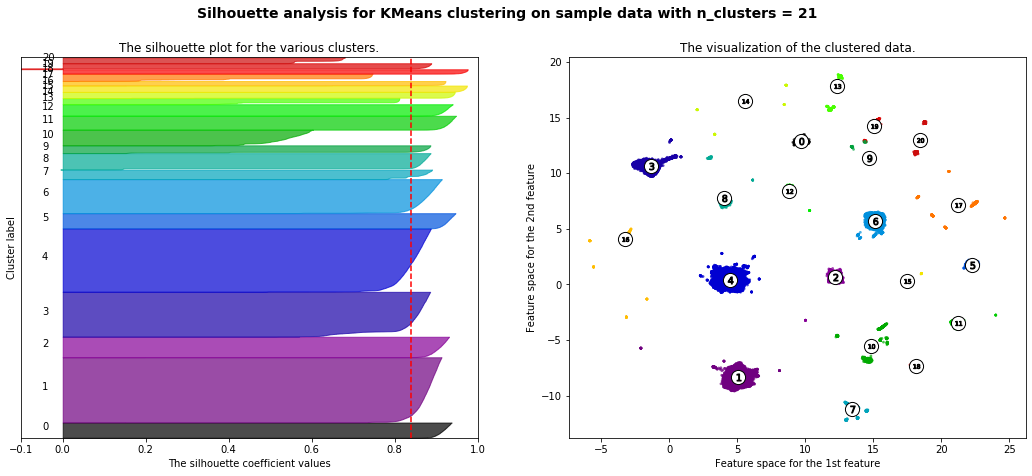

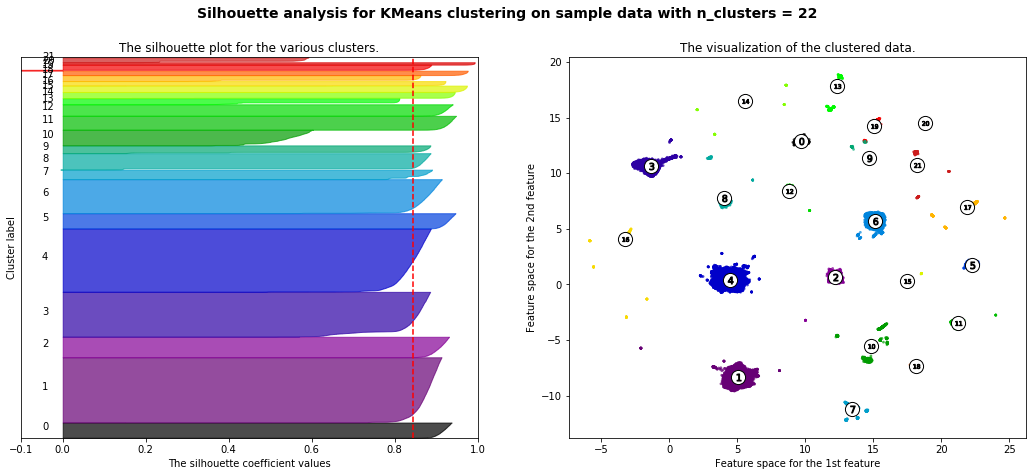

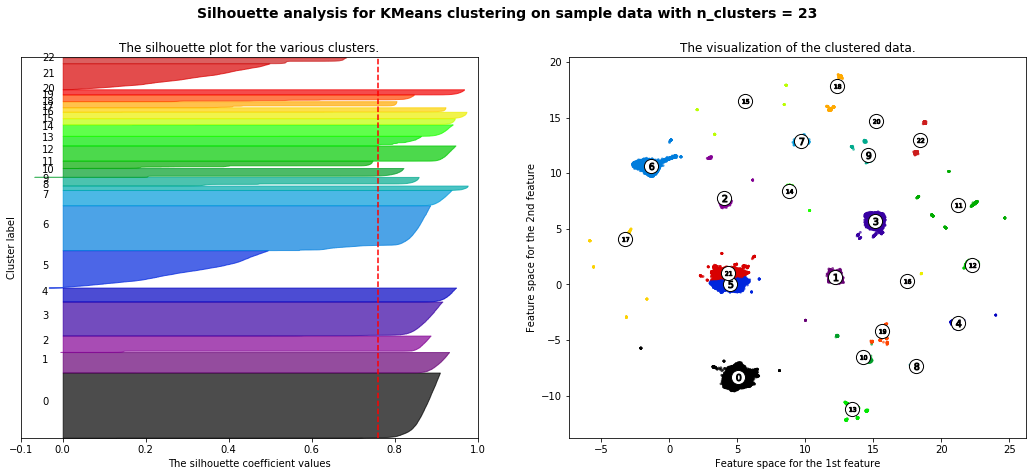

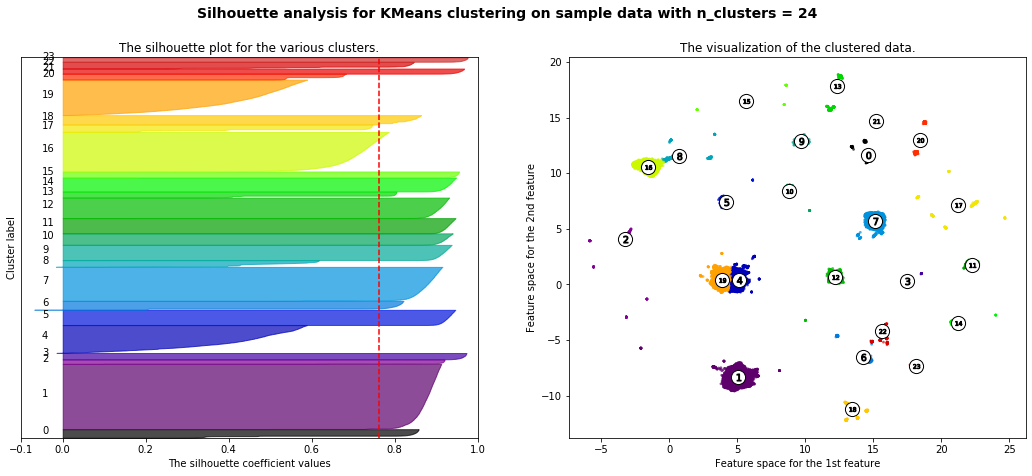

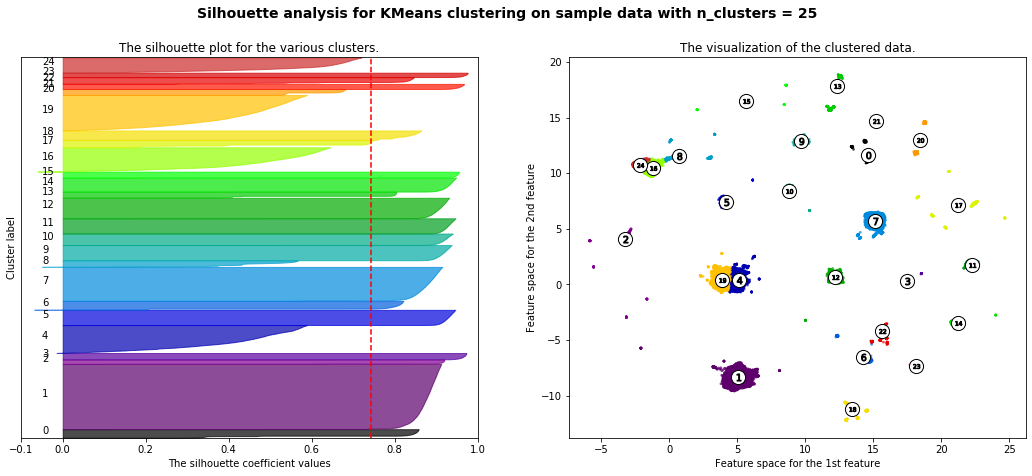

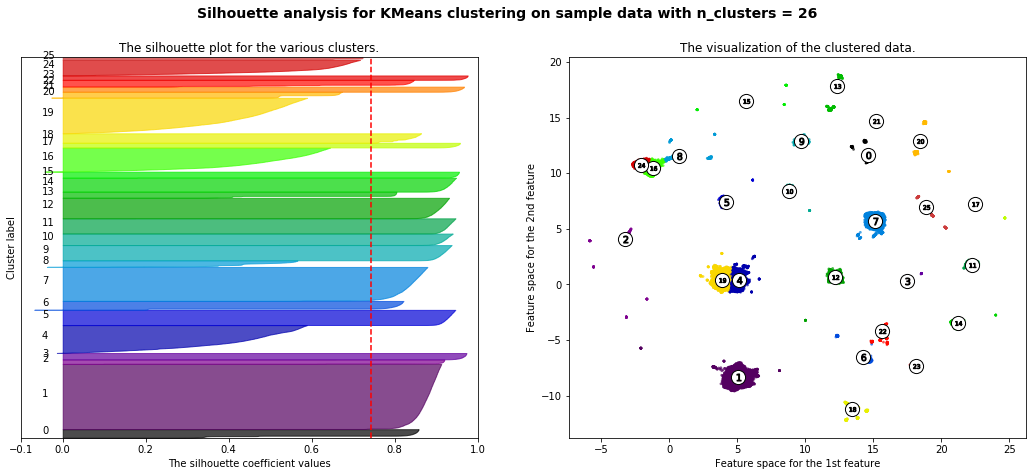

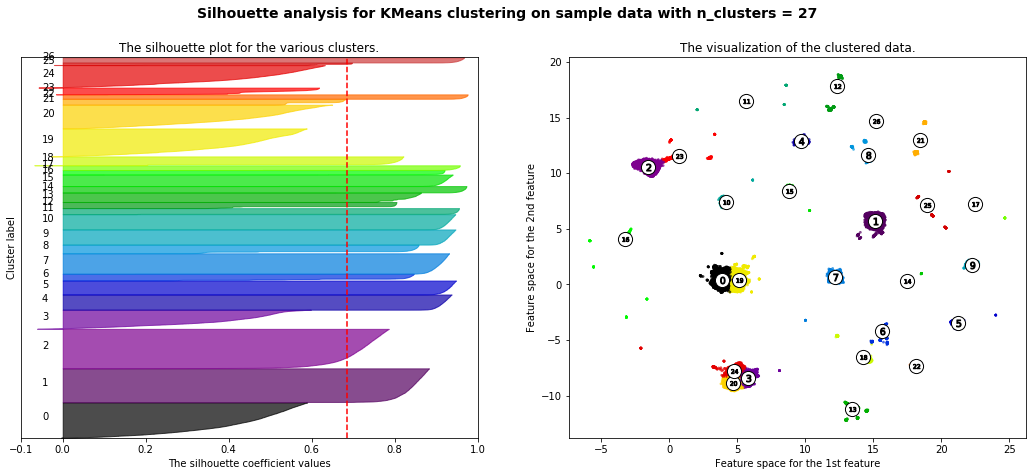

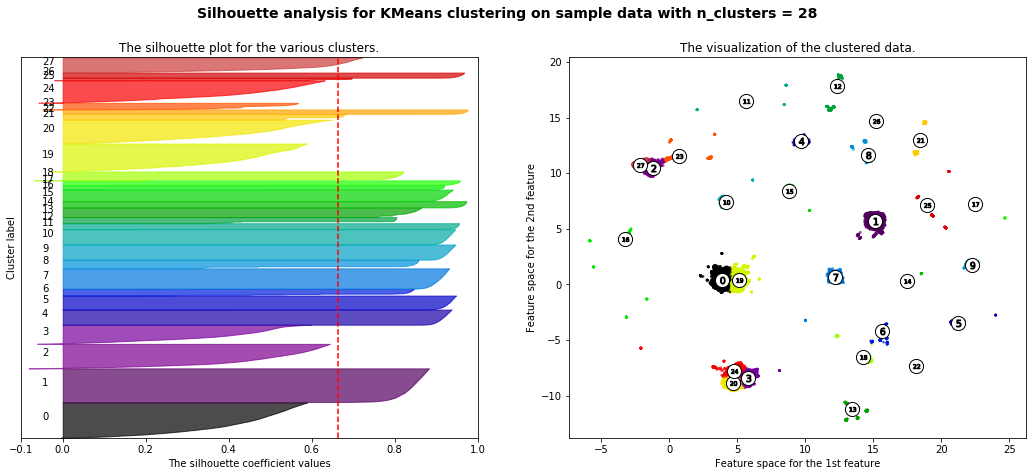

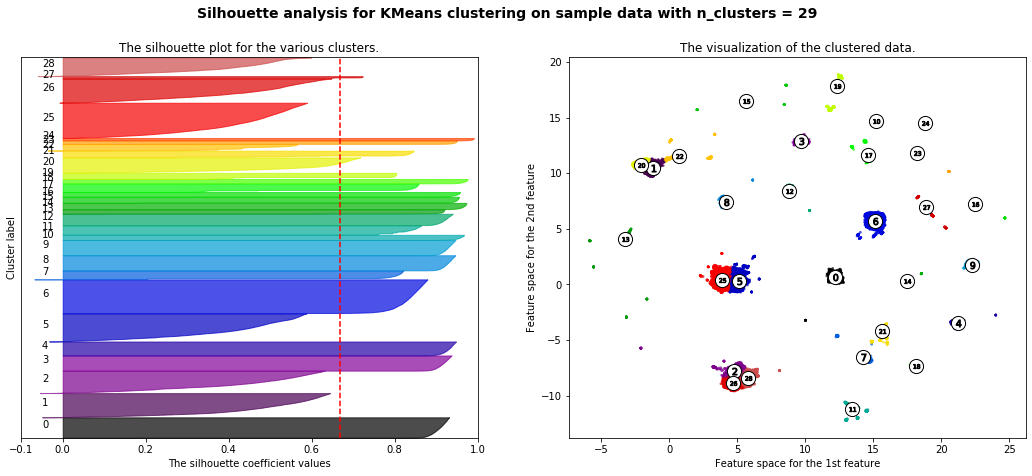

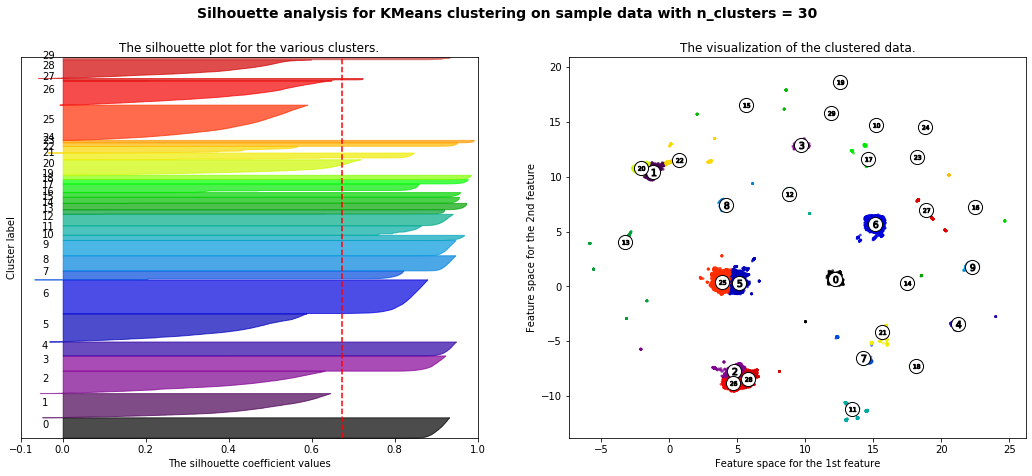

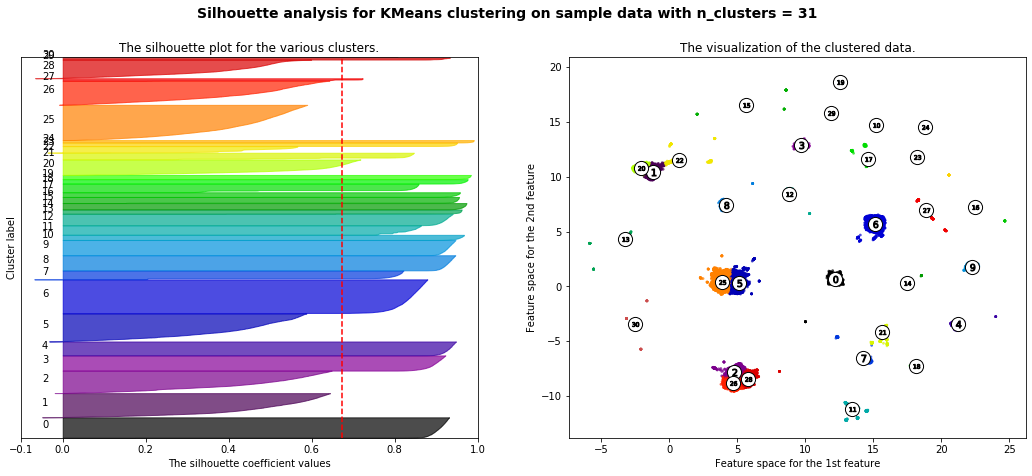

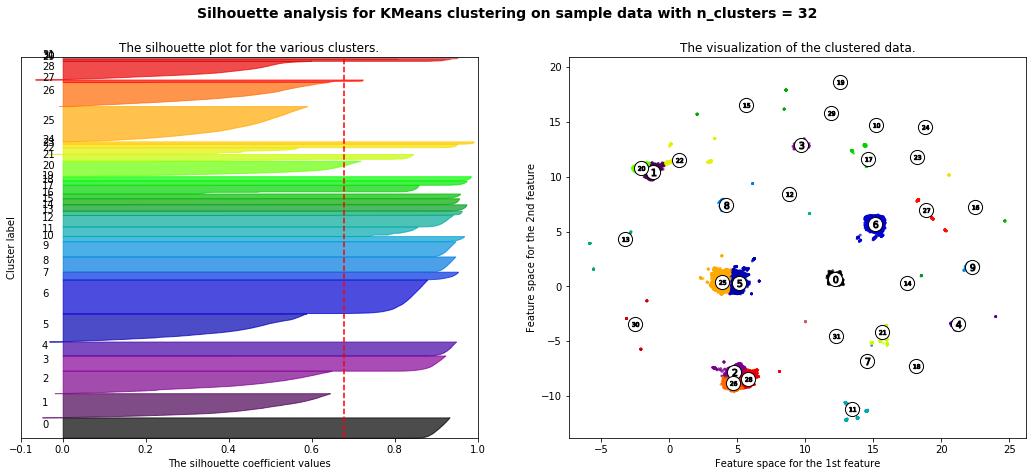

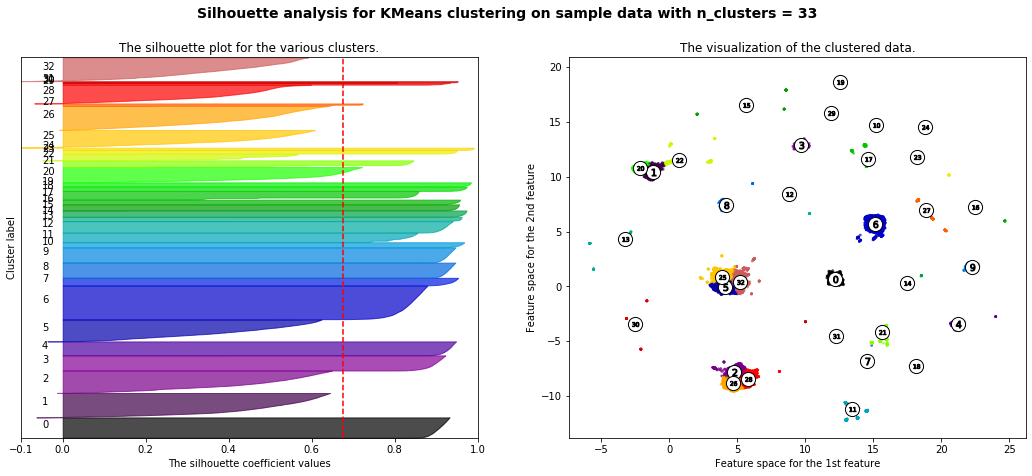

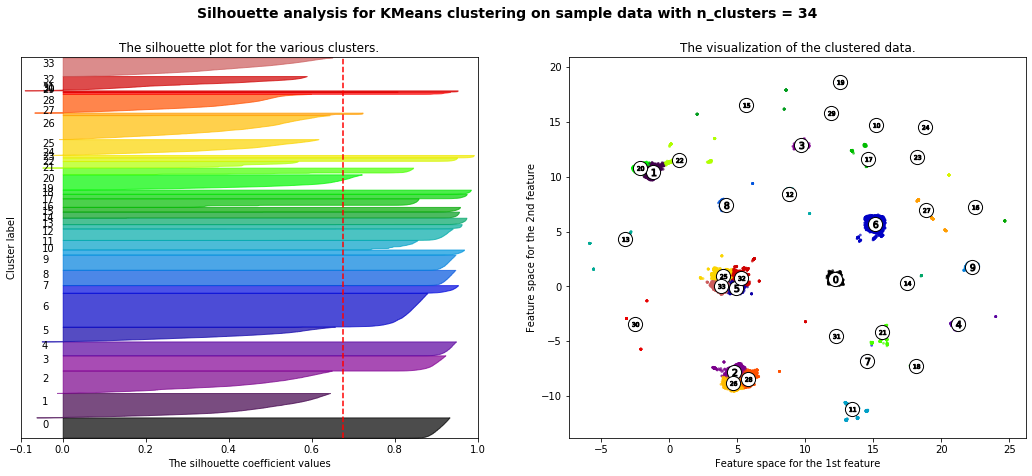

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(4,35):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Analyzing with narrative

In [13]:
number_clusters = 22
km = KMeans(n_clusters=number_clusters,init='k-means++')
indexes = km.fit_predict(data_reduced)
centroids = km.cluster_centers_

df_index = pd.DataFrame(indexes)

indici = []
for i in range(0,len(indexes)):
    indici.append(i)
df1 = df_index.set_index(pd.Index(indici))
df2 = df.set_index(pd.Index(indici))
df_result = pd.concat([df1,df2], axis = 1)
print(df_result)

        0  Row No Date received                  Product  \
0      14    6874      09/09/16              Payday loan   
1       7   10840      08/07/15            Consumer Loan   
2       7   12248      08/07/16            Consumer Loan   
3       7   17162      05/26/16            Consumer Loan   
4       7   17642      11/05/15            Consumer Loan   
...    ..     ...           ...                      ...   
58030   9  222826      09/21/16  Bank account or service   
58031   9  142174      03/05/16  Bank account or service   
58032   3   55888      01/23/17  Bank account or service   
58033   3  293505      09/27/16  Bank account or service   
58034   9  327087      09/28/15  Bank account or service   

                      Sub-product                                     Issue  \
0                            None  Charged fees or interest I didn't expect   
1                    Vehicle loan       Problems when you are unable to pay   
2                    Vehicle loan         

Cluster number: 0
an account listed as on my credit report is extremely old and i have attempted to dispute that it because it is well past years old and is not supposed to be reported to my credit file any longer because there has been absolutely no activity since i have disputed its acuracy and i have asked for it to be removed with certified mail various times this account has kept my credit down and is affecting me very negatoivey i have not recieved any adequate repsonse from transunion and they keep sending me generic answers and do not verify the facts that i am expressing to them pkease investogate this fro me this account is devasttaing my life and is not legally allowed to be on my file anymore why are they keeping it on my file illegally they have not verifed the dates that i have asked them to correct in order to see that this account has had no activuty n over years please help me someone i have no options left 

there are liens that are inaccurately reporting on my credit

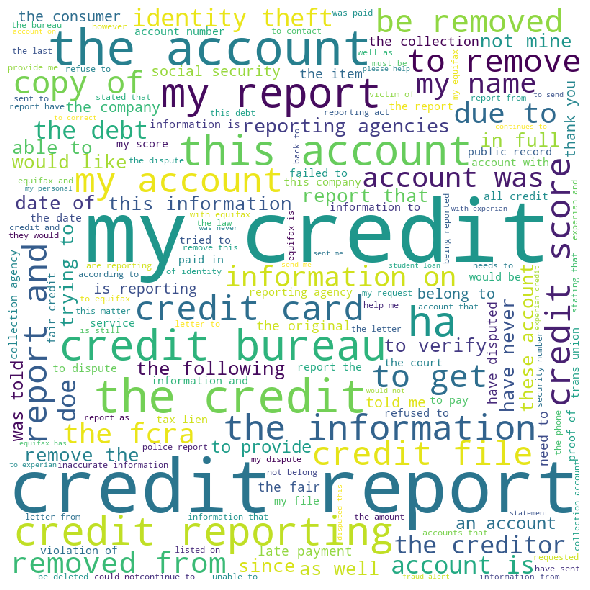

Cluster number: 1
this problem begins with a *non driver fault* failure of several components on a brand new leased honda crosstour ex l which resulted in a day stay at my dealer s shop this also followed a former day stay at the dealer for a airbag recall and a day stay for failure of center console latch and driver s side door panel this car has approx miles on it this complaint wo n t even with the three day stay during this latest incident of day stay at dealer i had to get a rental car and had to pay the gap insurance on it and the gasoline as well after all monday through friday without a car is tough with the above said i ve also additionally spent many hours the past two months trying to get payments posted on honda financial services site or figure out where my payments went thousands of others are also dealing with that as well *** this is n t how driving a honda used to be *** but wait it gets worse i contacted honda financial services to simply inquire about pro rating the 

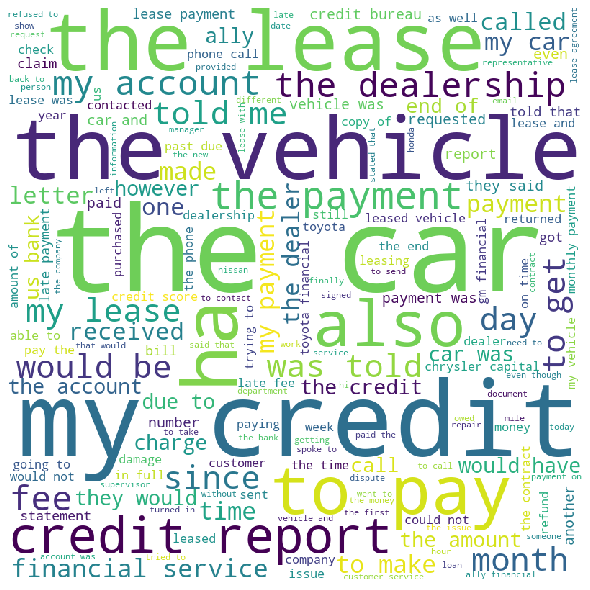

Cluster number: 2
Number of entries: 1449


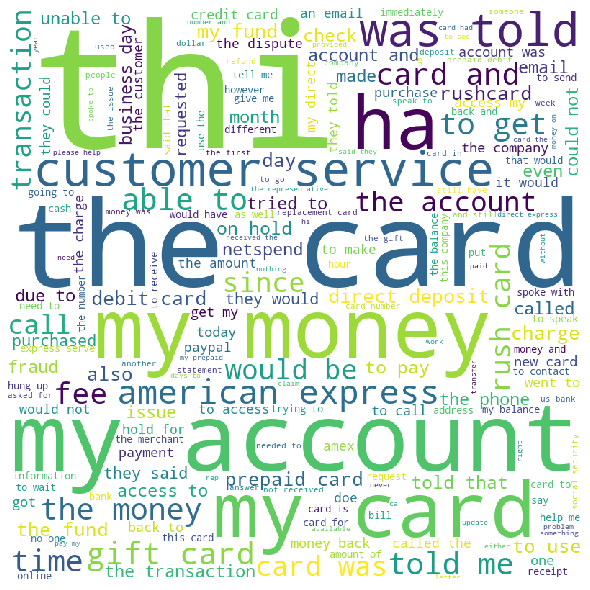

Cluster number: 3
i ve been a loyal customer of pnc bank for plus years recently they have started charging overdraft fees for pending transactions even when cash deposits have been made promptly and prior to these transactions clearing i even have a flexible spending account linked to my primary checking for overdraft protection this does not matter to them after speaking to customer service serveral times they can not explain these overdraft fees and just state that they are valid pnc bank has stolen several hundreds of dollars from me in the last several weeks blatant theft from loyal customers or any customer for that matter is not only outrageous but disgraceful 

i was given a fraudulent cashiers check i deposited into my savings account and made no attempt to withdraw the fund the check was determined to be a counterfeit cashiers check upon learning this fact i immediately notified the supposed issuing bank they informed me that they were experiencing a flood of fraudulent check

Number of entries: 6867


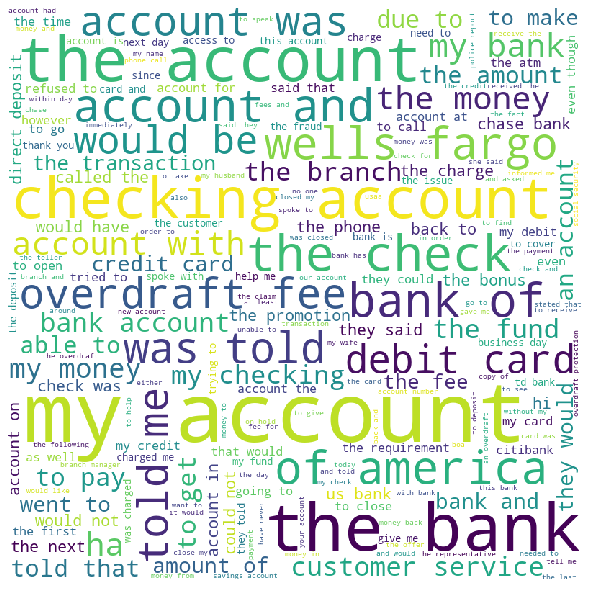

Cluster number: 4
i suspect they produced a forged note

ocwen is inaccurately reporting my escrow and payment information i had a chapter payment plan for mortgage arrears that was discharged my loan was originally with american home mortgage and was transferred to ocwen after making all on time payments to ocwen during the payment plan and making final cure payment to ocwen ocwen still reflects the escrow shortage balance that should have been paid off i contacted the trustee office which confirmed that all arrear payments had been made in full ocwen has not responded to my several requests for a detail accounting of my payment history since initially requesting this the office of the ombudsmen has sent me a letter each month telling me they are researching the matter but has failed to do anything more i just received a foreclosure prevention packet in the mail this week as well ocwen has since increased my mortgage payment by more than additional each month i am unable to pay the bo

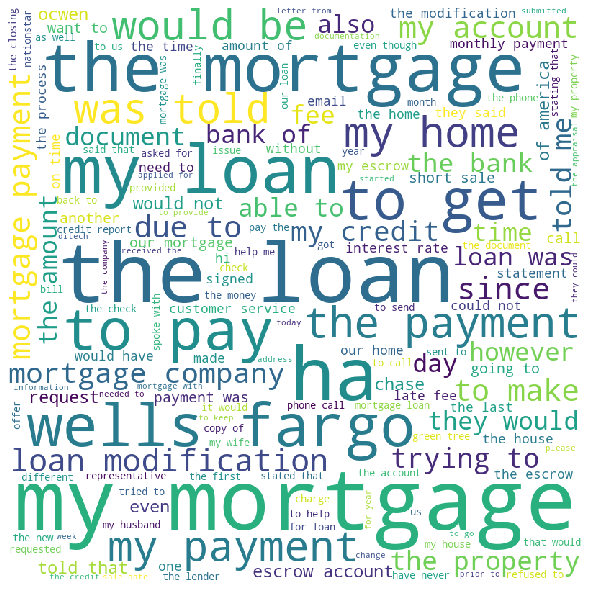

Cluster number: 5
in i had a credit card with hsbc bank on which i defaulted their collection efforts were unethical as they harassed and intimidated me to settle the account in full i felt harmed by the stress and intimidation they caused me 

i had a credit card for years and paid my balance each month the card was with hsbc for some unknown reason they closed my account i called them when my card did n t work and they stated they had no idea why but the account was closed and i d be informed in writing of this within days they told me they could n t do anything i would like to know why they are allowed to close accounts on people who pay their bill each month 

after going over my credit report from equifax i noticed that there was an additional closed credit card account i only have credit card from which is in good standing so i automatically knew that this credit card was n t mine and as further proof the status lists the consumer as deceased since this mishap should n t have hap

i was contacted in by target store s credit card division to inform me that a td banktarget store credit card application had been submitted at of its stores in north carolina and target suspected it was fraudulent i confirmed that the application was in fact fraudulent and target informed me that the application and account would be terminated target followed up with a paper mail affidavit for me to complete which i completed and mailed back to officially close the fraudulent account additionally i contacted the bureaus to place an active fraud alert on my credit file this week when checking my credit i learned that the td bank target credit card account was officially opened despite the extensive prior communication on the issue 

made payment on time but minutes late was charged fee called to complain and was told fee would credited back into account for being a loyal customer since and always paying on time now two month later they discover card has n t given me a refund after phon

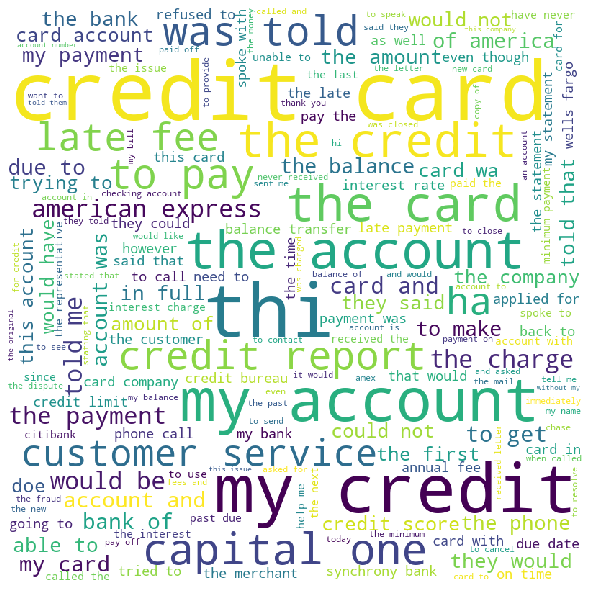

Cluster number: 6
applied for loan from ace cash express ace sent a phony government check that bank cashed and is now holding me responsible for the amount of the check 

i purchased a couple of items through conns home plus and since has been a nightmare i fell behind midway through the loan and had contacted them for additional help which they refused after they refused on an average i have been getting to calls a day including weekends and many are hang ups when i do take the calls they continue to harass me belittle me interrogate me and refused to work with me until recently last week around they contacted me and offered to defer payments toward the end of my contract if i paid which i did each day since i get multiple calls claiming that i still owe and that their rep was mistaken and should not have offered such a deal i asked them to listen to recording as they said they have on file but instead they are calling me a liar and continued to try and push me i eventually terminate

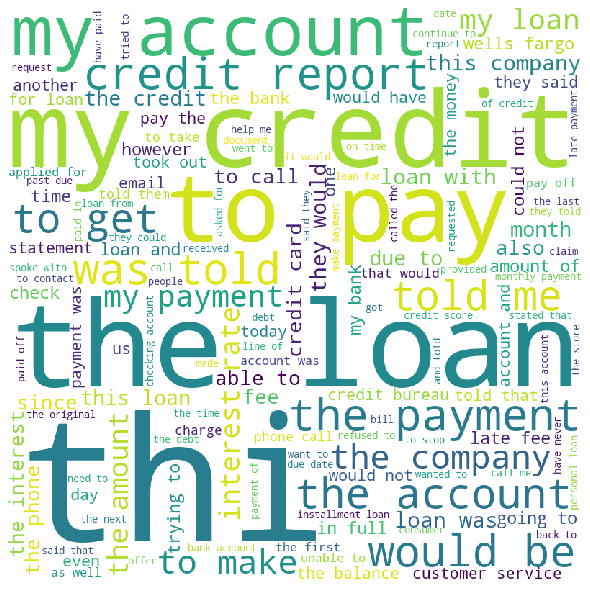

Cluster number: 7
snaac has been charging me late fees of per month and somehow is saying the late fees are now equal to but i have been charged the late fee in the monthly payment they are also stating that the repossession fee is the third party fee for calling the company to pick the vehicle up after talking to the third party they stated they have no set fee however snaac is still not removing the fee they are overcharging me on the payments and then still charging me late fees

i have a huge complant against this company they allow delarship to sell cars that arent any good i bought a bmw it has given me nothing but problems i spent over dollars getting the car fixed the first month of getting it the dealership refused to help pay and credit acceptance refused to credit my account for this since then within the lasts year over dollars have been spent fixing this car thats a whole new car my only resolution for this company is that im asking them to lower my pay off amount to to pa

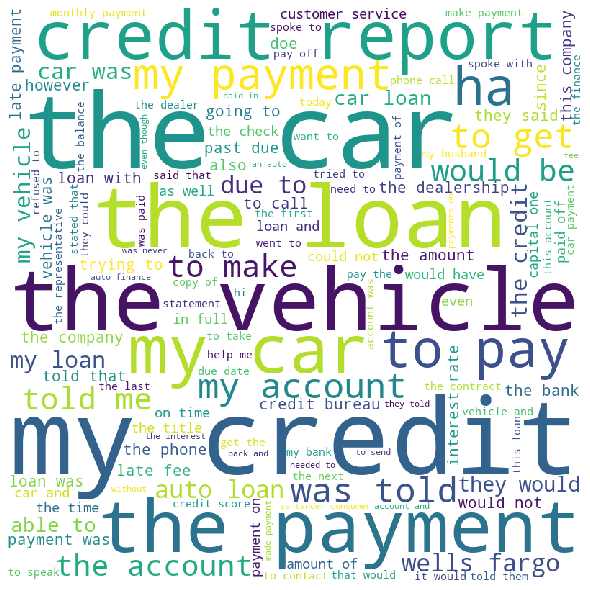

Cluster number: 8
Number of entries: 891


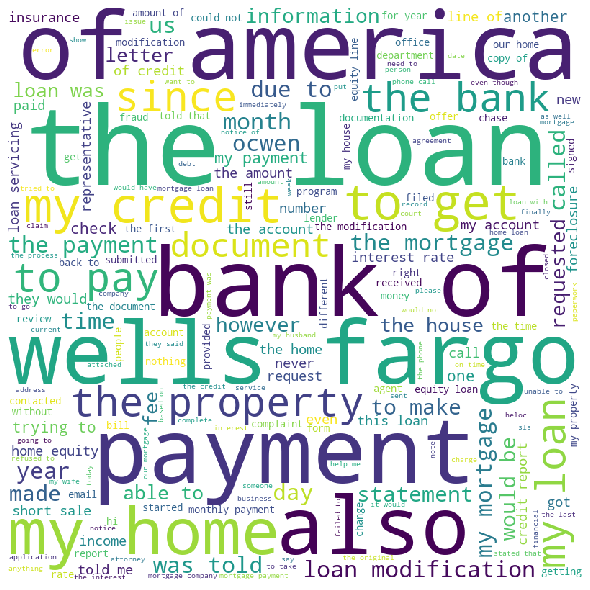

Cluster number: 9
Number of entries: 2513


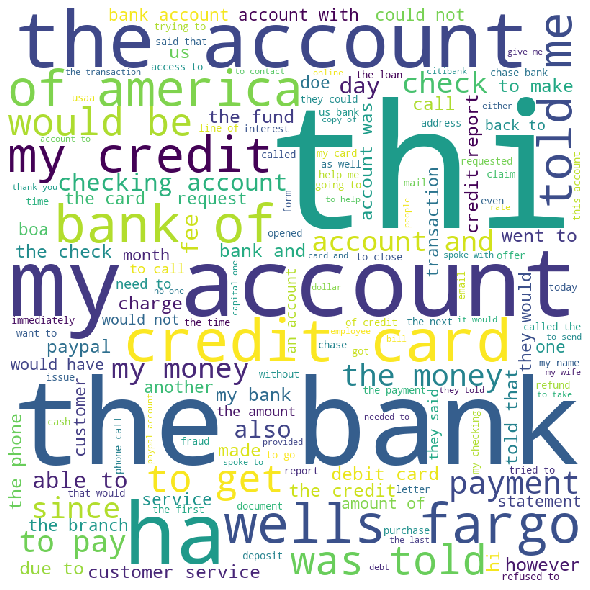

Cluster number: 10
Number of entries: 2129


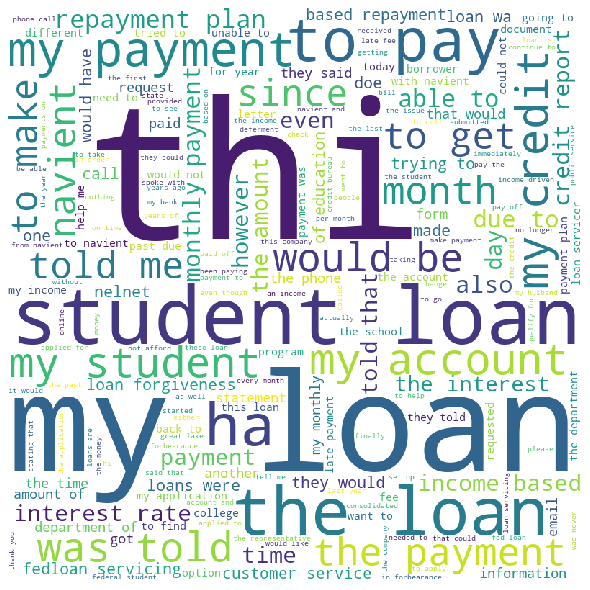

Cluster number: 11
lvnv funding garnished over on a debt that was aged out in washington state and that had gone through a mediation that had a class action lawsuit against and the mediation was thrown out they sent out a number of threatening letters that appeared as official documents the company sent out lawsuit paperwork that appeared as more of the bullying attempts and did not bear official seals of filing then without any further notice stole the money out of my account without warning 

thank you for taking the time to review my file and to help me with this matter of dealing with midland credit management to date midland has a poor track record in regards to its collection tactics which have resulted in fines from the united states government and from individual states as well as of this year midland has had to pay close to dollars in fines and penalties due to their unlawful business procedures which violate the consumer s rights their illegal actions have caused consumer s c

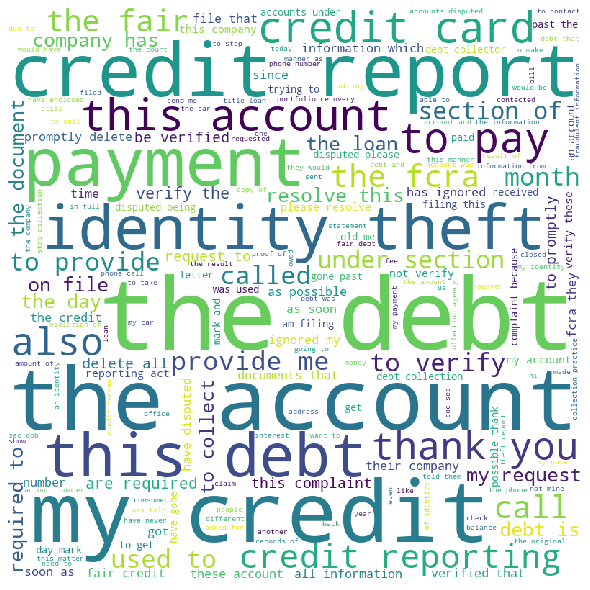

Cluster number: 12
i went to the illinois institute of art in il from recently i obtained my financial ledger as well as my transcript i had a friend who is well versed in reading and going over financial ledgers and comparing to transcripts and she found over in over charges from the school listed on my financial ledger this is insane i had pell grants il map grants and academic excellence awards my tuition was supposed to be it ended at over k even with my grants i want to request an audit my ledger shows in fees for online classes i never took over fall overage + overage + overage + shortage overage + overage this comes to over k but i factored in the stipends i know i did receive and deducted them to come to a figure around k i think these ledgers are intentionally confusing so that students do n t recognize the charges or question them apparently my stipends would come out of the but i only received stipend checks twice and nowhere near the amount that i was overcharged and this s

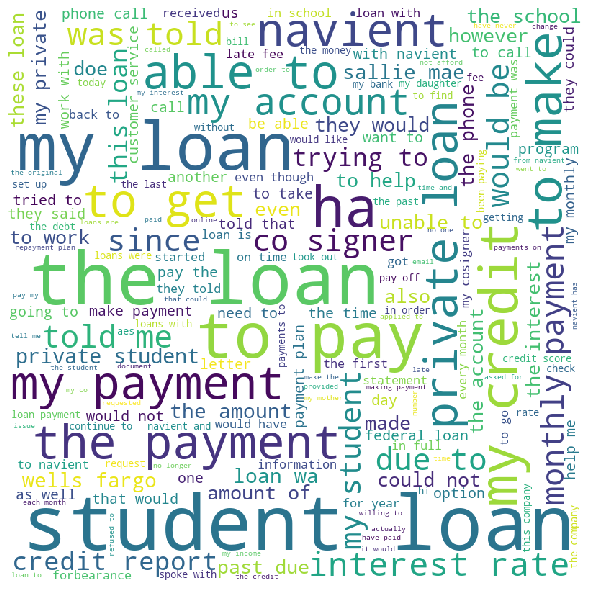

Cluster number: 13
 is billing me for service at a home that never had service in it s history when calling they do not know what i m talking about as they have no information for service at this address yet they have notified the credit bureaus as an unpaid debt bottom line can bill every address in country and make everyone pay just to get it removed from their credit reports and they make the dispute process extremely difficult

attempted to collect wrong amount i never had the services for the above said amount from and it is misleading me by having in collection folder makes uncomfortable please help me because of this my credit score has been drastically gone down please help me asap 

enhanced recovery placed a new collection account on my credit report the original account was settled thrust on telephone number is address nebraska per my credit report the file states closed and paid with a balance

i was contacted by diversified consultants dbs dci on regarding a bill i spoke t

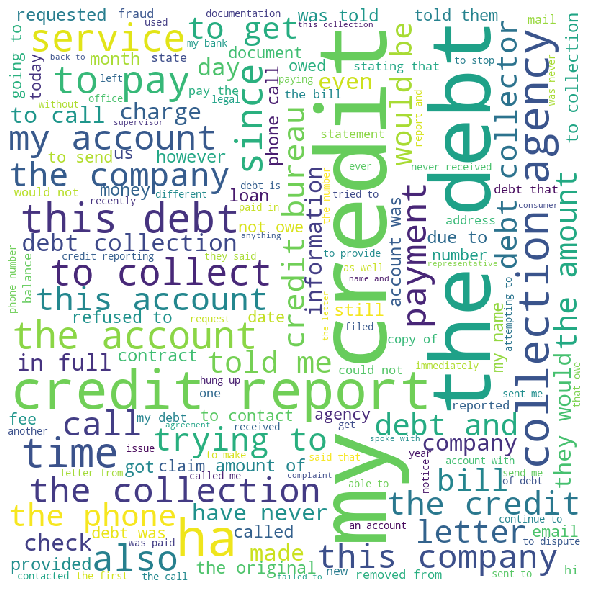

Cluster number: 14
i took out a loan with westen sky and it was immediately sold to and then ended up with delbert services they never took out the payment on the date they stated it always took longer and ended up costing me in overdraft fees etc i have been called by several companies claiming to collect for western sky and delbert services etc they all threaten and call friends and relatives with threatening tones 

this loan is illegal in the state they have this on my credit report and would like it to be removed they never sent me any verification of this debt when i would receive harassing phone calls at work and at home i sent them a ceased and desist letter and now it s on my credit report as midwest recovery system i do n t have this loan and owe them nothing is what is owed please look into this matter thank you 

Number of entries: 1756


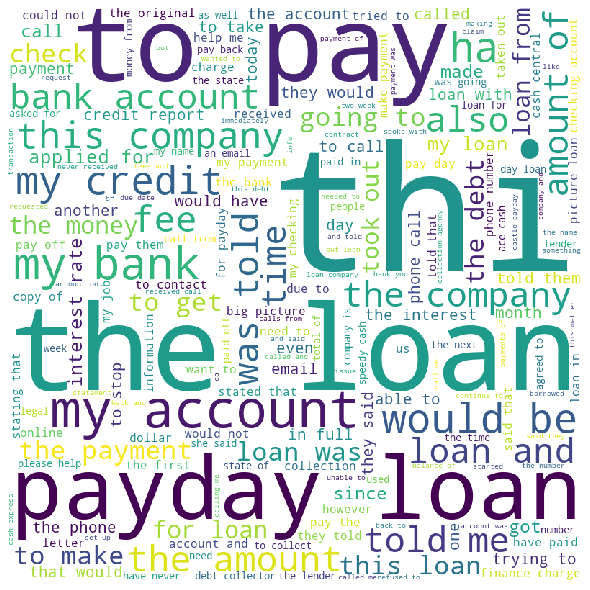

Cluster number: 15
Number of entries: 783


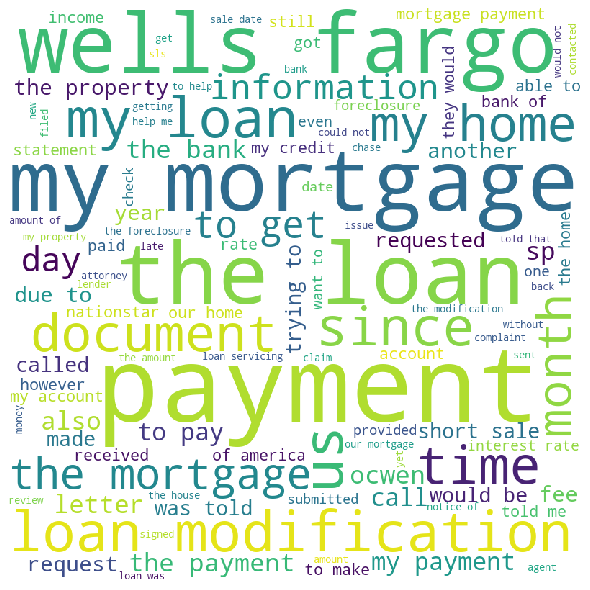

Cluster number: 16
Number of entries: 680


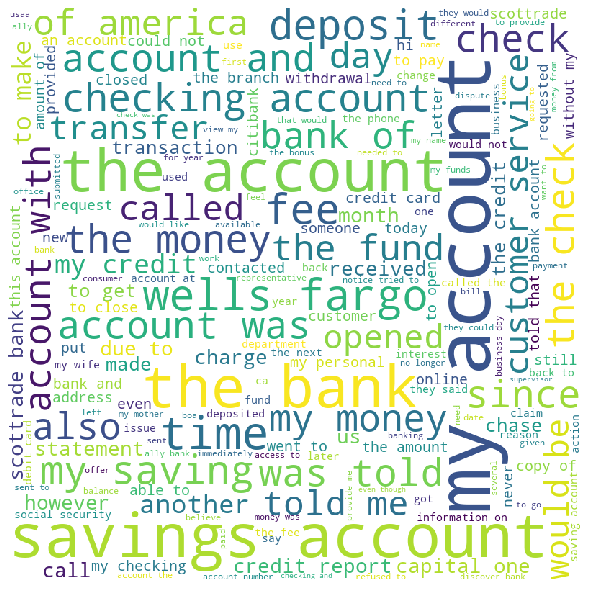

Cluster number: 17
Number of entries: 935


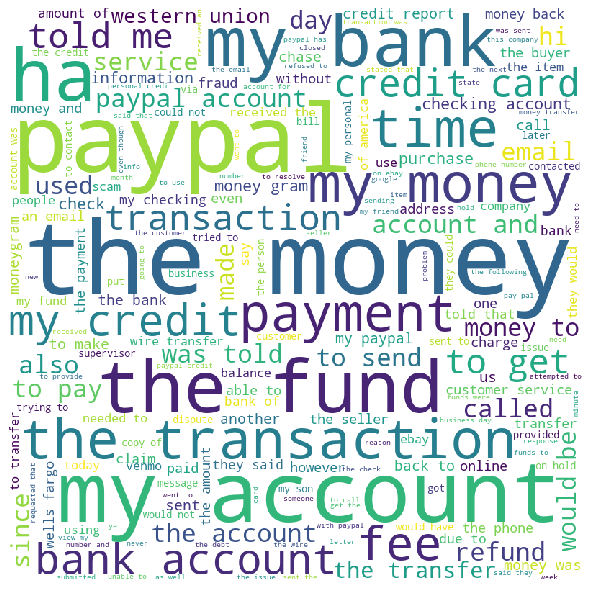

Cluster number: 18
Number of entries: 924


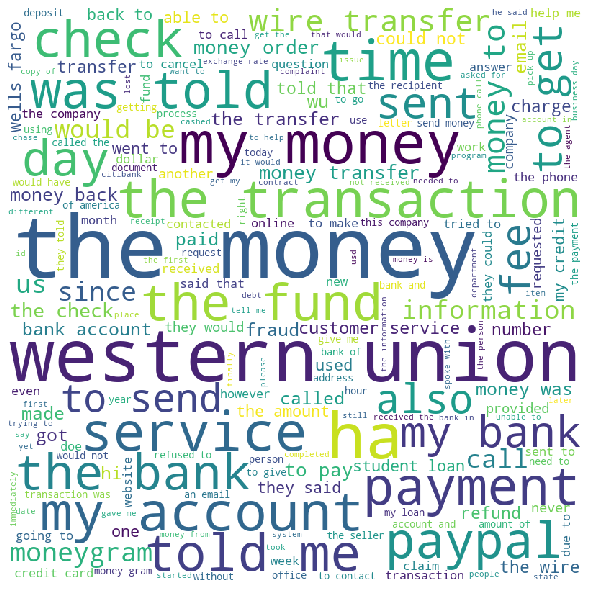

Cluster number: 19
i am the third party this company called me regarding my sister s debt that i have no connection to at all when i called them to tell them that they could not call me regarding my sister s debt they asked for more information including phone numbers etc they told me that they could not help me and to have a good day because they were a call center i told them that they are in violation of the fdcpa and they could not contact me again i told them i would report them and they hung up on me 

Number of entries: 1022


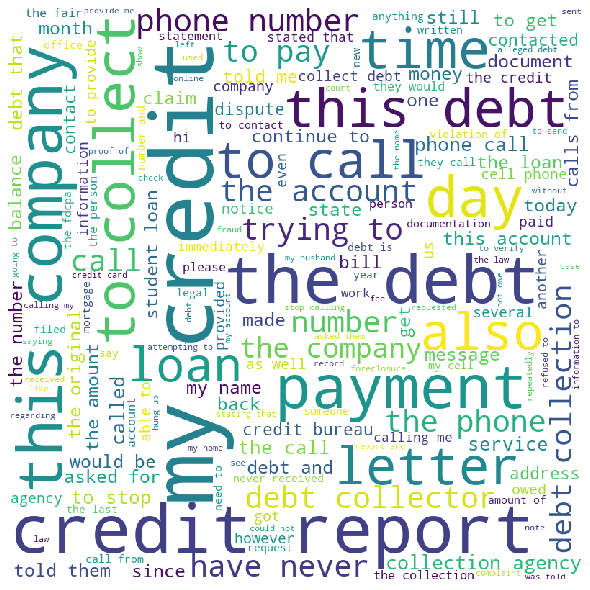

Cluster number: 20
nationstar mortgage acquired my loan from i asked in how to remove pmi from this loan and was sent a letter saying that i owed for removal i sent in from tax refund i received more letters from the last stated that i owed to remove pmi this was months ago and before the last payments to nationstar nationstar says that i owe the numbers are not even close how is there such a descrepency i did not ask for this change however i am not looking to lose several thousand dollars i have requested pmi removal from nationstar with no correspondence from them 

Number of entries: 1312


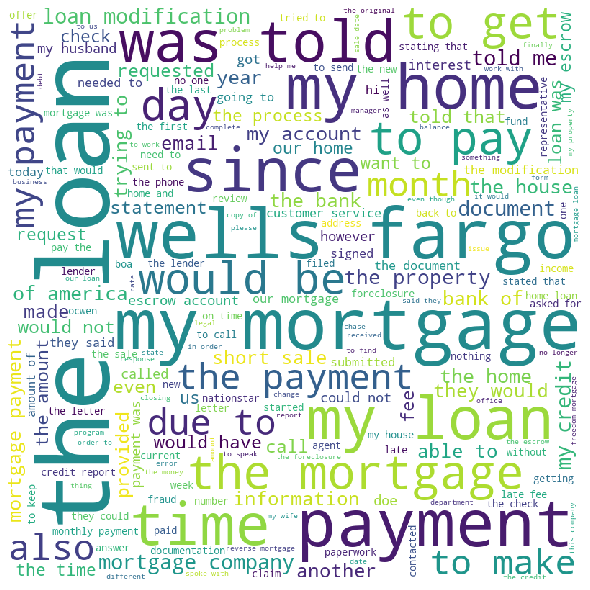

Cluster number: 21
Number of entries: 672


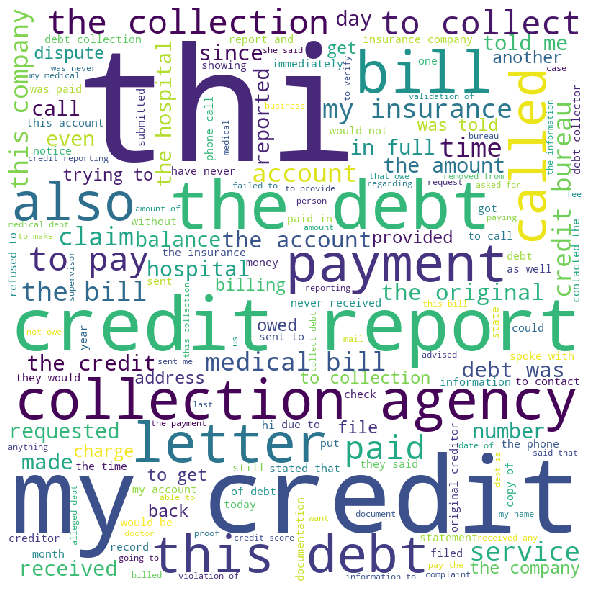

In [14]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import random

#if it's your first time running with these stopwords, run the following line aswell:
#nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
stopwords.add('xx')
stopwords.add('wa')

for i in range(0,number_clusters):
    all_words = ''
    print('Cluster number: '+str(i))
    amount = 0
    for index, row in df_result.iterrows():
        if row[0] == i:
            all_words += ' ' + row['Consumer complaint narrative']
            rand = random.randint(1,1000)
            amount += 1
            if(rand == 1):
                print(row['Consumer complaint narrative'] + '\n')
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 
    print('Number of entries: ' + str(amount))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 


## Visualizing clusters

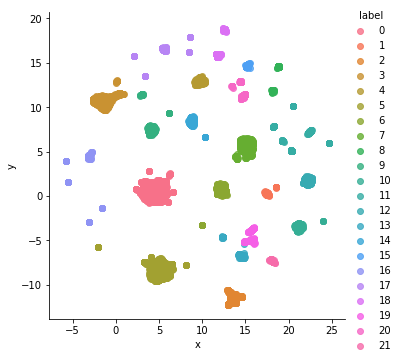

In [15]:
import seaborn as sns
_labels = pd.DataFrame(indexes)
labels = _labels.rename(columns={0: 'label'}) 

_reduced = pd.DataFrame(data_reduced)
reduced = _reduced.rename(columns={0: 'x', 1: 'y'}) 

clusters = pd.concat([reduced, labels], axis = 1)


facet = sns.lmplot(data=clusters, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)
